<a href="https://colab.research.google.com/github/LucasVale98/Machine_Learning_e_Data_Science_com_Python_de_A-Z/blob/main/T%C3%B3picos_complementares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import random

import numpy as np

In [ ]:
import matplotlib.pyplot as plt

import bs4 as bs
import urllib.request
import nltk
import spacy

from spacy.matcher import PhraseMatcher
from IPython.core.display import HTML
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

import nltk

In [ ]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=528bbe709acf75191b1374a1054b808d37786ce062a1bfe8b0aa0fcdb2333a96
  Stored in directory: /tmp/pip-ephem-wheel-cache-uqxmead5/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


# **Aprendizagem por reforço com Q-Learning**

- Código adaptado de: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

**Configuração do ambiente**

In [ ]:
env = gym.make('Taxi-v3').env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
#1 - south | 2 - north | 3 - east | 4 - west | 5 - pickup | 6 - dropoff
print(env.action_space)

Discrete(6)


In [ ]:
print(env.observation_space)

Discrete(500)


In [ ]:
len(env.P)

500

In [ ]:
env.P

{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

In [ ]:
env.P[484]

{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

**Treinamento 1**

Diferença temporal (Q-learning)

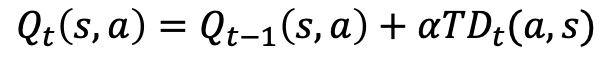

In [ ]:
%%time
from IPython.display import clear_output

CPU times: user 18 µs, sys: 4 µs, total: 22 µs
Wall time: 26.7 µs


In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [ ]:
q_table[0]

array([0., 0., 0., 0., 0., 0.])

In [ ]:
# 1-10% 3-90%
# exploration / exploitation
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
%%time
from IPython.display import clear_output

alpha = 0.1
gamma = 0.6
epsilon = 0.1

for i in range(10000):
  estado = env.reset()

  penalidades, recompensa = 0, 0
  done = False
  while not done:
    # Exploração
    if random.uniform(0, 1) < epsilon:
      acao = env.action_space.sample()
    # Exploitation
    else:
      acao = np.argmax(q_table[estado])

    proximo_estado, recompensa, done, info = env.step(acao)

    q_antigo = q_table[estado, acao]
    proximo_maximo = np.max(q_table[proximo_estado])

    q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)
    q_table[estado, acao] = q_novo

    if recompensa == -10:
      penalidades += 1

    estado = proximo_estado

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episódio: ', i)

print('Treinamento concluído')

Episódio:  9900
Treinamento concluído
CPU times: user 10.1 s, sys: 1.82 s, total: 11.9 s
Wall time: 10.2 s


In [ ]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
q_table[346]

array([-2.48465567, -2.4823643 , -2.48260446, -2.48341184, -7.23688299,
       -8.39834204])

In [ ]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [ ]:
env.encode(3, 2, 1, 2)

346

**Avaliação**

total_penalidades = 0
episodios = 50
frames = []

for _ in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(q_table[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

frames[0]

from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(1)

# **Processamento de Linguagem Natural com spaCy e NLTK**

**Marcação POS, lematização e stemização**

**Marcação POS**

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguagem natural curso em Curitiba')
documento

Estou aprendendo processamento de linguagem natural curso em Curitiba

In [ ]:
type(documento)

spacy.tokens.doc.Doc

Lematização e stemização

In [ ]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
curso NOUN
em ADP
Curitiba PROPN


In [ ]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
curso cursar
em em
Curitiba Curitiba


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
curso cursar curs
em em em
Curitiba Curitiba curitib


**Carregamento da base de dados**

- Inteligência artificial

https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"9e3d4726-c9d1-4222-9ae2-032d42ad473a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros em refer\xc3\xa

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"9e3d4726-c9d1-4222-9ae2-032d42ad473a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-fontes em líng

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

105

In [ ]:
paragrafos[1]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.<sup class="reference" i

In [ ]:
paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [ ]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

**Buscas em textos com spaCy**

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
string = 'turing'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [ ]:
doc[2323:2324], doc[2323-5:2324+5]

(research, defesa (“defense advanced research projects agency”),)

In [ ]:
doc[2333:2334], doc[2333-5:2334+5]

(e, , nos estados unidos, e pelo projeto da quinta geração)

In [ ]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3044, 3045), 3044, 3045)

In [ ]:
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

**Extração de entidades nomeadas**



- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [ ]:
displacy.render(doc, style = 'ent', jupyter = True)

**Nuvem de palavras com Python**

In [ ]:
print(STOP_WORDS)

{'uns', 'meus', 'valor', 'possivelmente', 'usar', 'máximo', 'apoia', 'sem', 'cedo', 'fazeis', 'oitava', 'pois', 'quanto', 'número', 'próxima', 'minha', 'oito', 'meio', 'vocês', 'com', 'deve', 'estar', 'quer', 'irá', 'novos', 'na', 'dentro', 'tentei', 'você', 'foram', 'mais', 'pelo', 'numa', 'atrás', 'este', 'sistema', 'geral', 'quarta', 'nossa', 'ser', 'põem', 'terceiro', 'meses', 'tipo', 'dão', 'pode', 'algo', 'fazes', 'certeza', 'vem', 'esta', 'coisa', 'dezanove', 'outra', 'pela', 'primeira', 'assim', 'maioria', 'diz', 'primeiro', 'sete', 'terceira', 'tuas', 'têm', 'onde', 'num', 'posição', 'essas', 'momento', 'sempre', 'fora', 'dizem', 'tem', 'vais', 'estava', 'lhe', 'tua', 'não', 'mal', 'sua', 'de', 'vinda', 'apontar', 'sétimo', 'seria', 'obrigado', 'seis', 'povo', 'mil', 'podia', 'bem', 'elas', 'tanta', 'eu', 'depois', 'vez', 'quê', 'quatro', 'onze', 'dá', 'vinte', 'teus', 'somos', 'meu', 'também', 'isso', 'vários', 'tais', 'tivestes', 'dez', 'podem', 'desde', 'dezassete', 'fazemo

In [ ]:
len(STOP_WORDS)

413

In [ ]:
pln.vocab['usa'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [ ]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'inteligência', 'artificial', '(', 'por', 'vezes', 'mencionada', 'pela', 'sigla', 'em', 'português', 'ia', 'ou', 'pela', 'sigla', 'em', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'é', 'a', 'inteligência', 'similar', 'à', 'humana', 'exibida', 'por', 'sistemas', 'de', 'software', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico', '.', 'os', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', 'como', '"', 'o', 'estudo', 'e', 'projeto', 'de', 'agentes', 'inteligentes', '"', ',', 'onde', 'um', 'agente', 'inteligente', 'é', 'um', 'sistema', 'que', 'percebe', 'seu', 'ambiente', 'e', 'toma', 'atitudes', 'que', 'maximizam', 'suas', 'chances', 'de', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', 'como', '“', 'uma', 'capacidade', 'do', 'sistema', 'para', 'interpretar', 'corretamente'

In [ ]:
len(lista_token)

9939

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n', 'inteligência', 'artificial', '(', 'mencionada', 'sigla', 'português', 'ia', 'sigla', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'a', 'inteligência', 'similar', 'humana', 'exibida', 'sistemas', 'software', ',', 'campo', 'estudo', 'acadêmico', '.', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', '"', 'o', 'estudo', 'e', 'projeto', 'agentes', 'inteligentes', '"', ',', 'agente', 'inteligente', 'percebe', 'ambiente', 'e', 'toma', 'atitudes', 'maximizam', 'chances', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', '“', 'capacidade', 'interpretar', 'corretamente', 'dados', 'externos', ',', 'aprender', 'a', 'd', 'dados', 'e', 'utilizar', 'aprendizagens', 'atingir', 'objetivos', 'e', 'tarefas', 'específicas', 'adaptação', 'flexível”.[1', ']', 'john', 'mccarthy', ',', 'cunhou', 'o', 'termo', '1956', '(', '"', 'conferência',

In [ ]:
len(sem_stop)

6602

In [ ]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

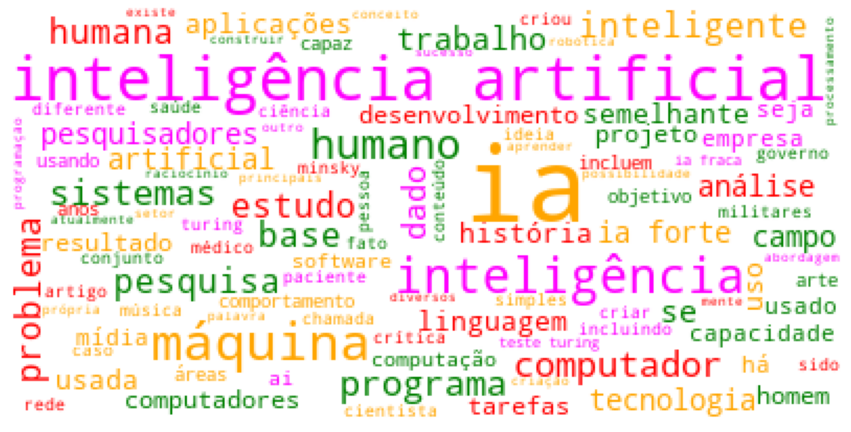

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

**Classificação de sentimentos com spaCy 1**

In [ ]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
spacy.__version__

'2.2.4'

In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf8')
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [ ]:
base_dados.shape

(196, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


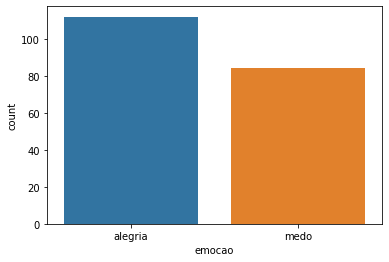

In [ ]:
sns.countplot(base_dados['emocao'], label='Contagem');

**Classificação de sentimentos com spaCy 2**

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop_words = STOP_WORDS
print(stop_words)

{'uns', 'meus', 'valor', 'possivelmente', 'usar', 'máximo', 'apoia', 'sem', 'cedo', 'fazeis', 'oitava', 'pois', 'quanto', 'número', 'próxima', 'minha', 'oito', 'meio', 'vocês', 'com', 'deve', 'estar', 'quer', 'irá', 'novos', 'na', 'dentro', 'tentei', 'você', 'foram', 'mais', 'pelo', 'numa', 'atrás', 'este', 'sistema', 'geral', 'quarta', 'nossa', 'ser', 'põem', 'terceiro', 'meses', 'tipo', 'dão', 'pode', 'algo', 'fazes', 'certeza', 'vem', 'esta', 'coisa', 'dezanove', 'outra', 'pela', 'primeira', 'assim', 'maioria', 'diz', 'primeiro', 'sete', 'terceira', 'tuas', 'têm', 'onde', 'num', 'posição', 'essas', 'momento', 'sempre', 'fora', 'dizem', 'tem', 'vais', 'estava', 'lhe', 'tua', 'não', 'mal', 'sua', 'de', 'vinda', 'apontar', 'sétimo', 'seria', 'obrigado', 'seis', 'povo', 'mil', 'podia', 'bem', 'elas', 'tanta', 'eu', 'depois', 'vez', 'quê', 'quatro', 'onze', 'dá', 'vinte', 'teus', 'somos', 'meu', 'também', 'isso', 'vários', 'tais', 'tivestes', 'dez', 'podem', 'desde', 'dezassete', 'fazemo

In [ ]:
len(stop_words)

413

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

**Classificação de sentimentos com spaCy 3**

In [ ]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [ ]:
base_dados.texto = base_dados.texto.apply(preprocessamento)

In [ ]:
base_dados.head()

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria


**Classificação de sentimentos com spaCy 4**

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

exemplo_base_dados

[['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['este lugar continua assustador', {'ALEGRIA': False, 'MEDO': True}]]

In [ ]:
type(exemplo_base_dados)

list

In [ ]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

In [ ]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
base_dados_final[0][0]

'trabalhar agradável'

In [ ]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

**Classificação de sentimentos com spaCy 5**

In [ ]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []

**Classificação de sentimentos com spaCy 6**

In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.0074633825570344925}
{'textcat': 1.5830633337543532e-07}
{'textcat': 4.5352814836974176e-08}
{'textcat': 2.457235792618917e-08}
{'textcat': 1.5374278183877266e-08}
{'textcat': 1.0207204970136274e-08}
{'textcat': 7.0142204267042985e-09}
{'textcat': 4.649225837649595e-09}
{'textcat': 4.40818903602036e-09}
{'textcat': 3.7021665733050213e-09}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.46338256e-03, 1.58306333e-07, 4.53528148e-08, 2.45723579e-08,
       1.53742782e-08, 1.02072050e-08, 7.01422043e-09, 4.64922584e-09,
       4.40818904e-09, 3.70216657e-09])

Text(0, 0.5, 'Erro')

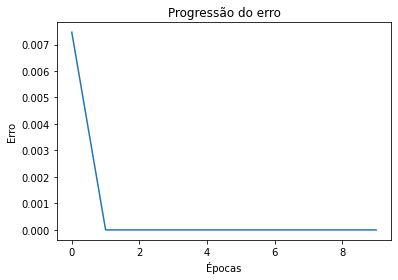

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

**Classificação de sentimentos com spaCy 7**

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'
texto_positivo

'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [ ]:
previsao.cats

{'ALEGRIA': 0.9968228340148926, 'MEDO': 0.0007304389728233218}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.0024390125181525946, 'MEDO': 0.9971132278442383}

**Classificação de sentimentos com spaCy 8**

In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)
previsoes

[{'ALEGRIA': 0.9998812675476074, 'MEDO': 0.00041900493670254946},
 {'ALEGRIA': 0.9995086193084717, 'MEDO': 0.0004074719035997987},
 {'ALEGRIA': 0.9998032450675964, 'MEDO': 0.00021643939544446766},
 {'ALEGRIA': 0.9996546506881714, 'MEDO': 0.00024888652842491865},
 {'ALEGRIA': 0.9996134638786316, 'MEDO': 0.00031384348403662443},
 {'ALEGRIA': 0.9996028542518616, 'MEDO': 0.000244530092459172},
 {'ALEGRIA': 0.9997866749763489, 'MEDO': 7.94053339632228e-05},
 {'ALEGRIA': 0.999647855758667, 'MEDO': 0.0005956065724603832},
 {'ALEGRIA': 0.9997349381446838, 'MEDO': 0.0002208761579822749},
 {'ALEGRIA': 0.9995601773262024, 'MEDO': 0.0004925134708173573},
 {'ALEGRIA': 0.9998674392700195, 'MEDO': 0.0002145098551409319},
 {'ALEGRIA': 0.9999436140060425, 'MEDO': 9.999274334404618e-05},
 {'ALEGRIA': 0.9998314380645752, 'MEDO': 0.00013582559768110514},
 {'ALEGRIA': 0.9995206594467163, 'MEDO': 0.00036725238896906376},
 {'ALEGRIA': 0.999504566192627, 'MEDO': 0.0007226017769426107},
 {'ALEGRIA': 0.99986100

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

**Classificação de sentimentos com spaCy 9**

In [ ]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)
previsoes

[{'ALEGRIA': 0.10656977444887161, 'MEDO': 0.9091267585754395},
 {'ALEGRIA': 0.08670909702777863, 'MEDO': 0.9929333925247192},
 {'ALEGRIA': 0.7604787349700928, 'MEDO': 0.25223076343536377},
 {'ALEGRIA': 0.9988898634910583, 'MEDO': 0.00164412846788764},
 {'ALEGRIA': 0.9811105728149414, 'MEDO': 0.3001423180103302},
 {'ALEGRIA': 0.00020094457431696355, 'MEDO': 0.9987621307373047},
 {'ALEGRIA': 0.010624194517731667, 'MEDO': 0.992935836315155},
 {'ALEGRIA': 0.9995744824409485, 'MEDO': 0.0012703562388196588},
 {'ALEGRIA': 0.9999414682388306, 'MEDO': 0.00011247130169067532},
 {'ALEGRIA': 0.5978923439979553, 'MEDO': 0.8848835825920105},
 {'ALEGRIA': 0.8989664912223816, 'MEDO': 0.011675124987959862},
 {'ALEGRIA': 0.0003010107029695064, 'MEDO': 0.9996083378791809},
 {'ALEGRIA': 0.8326494097709656, 'MEDO': 0.20758701860904694},
 {'ALEGRIA': 0.9788065552711487, 'MEDO': 0.03042532503604889},
 {'ALEGRIA': 0.999687910079956, 'MEDO': 0.000874557183124125},
 {'ALEGRIA': 0.8006255626678467, 'MEDO': 0.732

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['medo', 'medo', 'alegria', 'alegria', 'alegria', 'medo', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'medo', 'medo',
       'alegria', 'medo', 'alegria', 'alegria', 'medo', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'medo', 'medo', 'medo', 'medo', 'medo', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'medo', 'medo', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'medo', 'alegria',
       'alegria', 'medo', 'medo', 'alegria', 'medo', 'medo', 'alegria',
       'alegria', 'alegria', 'medo', 'medo'], dtype='<U7')

In [ ]:
respostas_reais = base_dados_teste['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.6071428571428571

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

# **Visão computacional**

**Detecção de faces - implementação**

In [ ]:
import cv2 # OpenCV
from google.colab.patches import cv2_imshow

In [ ]:
imagem = cv2.imread('/content/workplace-1245776_1920.jpg')
cv2_imshow(imagem)

In [ ]:
detector_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [ ]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))
deteccoes

In [ ]:
len(deteccoes)

In [ ]:
for (x, y, l, a) in deteccoes:
  #print(x, y, l, a)
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(imagem)

**Detecção do corpo**

In [ ]:
image = cv2.imread('/content/pessoas.jpg')
cv2_imshow(image)

In [ ]:
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.1, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

**Reconhecimento facial - treinamento**

In [ ]:
import zipfile
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
os.listdir('/content/yalefaces/train')

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/train/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

In [ ]:
print(faces)

In [ ]:
print(faces[0])

In [ ]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

**Reconhecimento facial - classificação**

In [ ]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

In [ ]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

In [ ]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

In [ ]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)